In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df_log <- read.csv(file = 'events.csv', sep = ',', stringsAsFactors = FALSE)
df_log$first_timestamp <- as.POSIXct(df_log$first_timestamp,format='%Y-%m-%dT%H:%M:%SZ', tzone = "UTC")
df_log$timestamp <- as.numeric(df_log$first_timestamp)

df_log <- df_log %>%
  group_by(uid) %>%
  mutate(min_timestamp = min(timestamp)) %>%
  ungroup()

head(df_log)
tail(df_log)

uid                                 
1 7192b6a8-4c99-463e-8fd5-f6eed5d555e8
2 7192b6a8-4c99-463e-8fd5-f6eed5d555e8
3 7192b6a8-4c99-463e-8fd5-f6eed5d555e8
4 7192b6a8-4c99-463e-8fd5-f6eed5d555e8
5 7192b6a8-4c99-463e-8fd5-f6eed5d555e8
6 39dd0a18-0c33-42da-8464-34a1a5ee2edd
  name                                        function_name  
1 wskowdev-invoker-00-4-guest-floatoperation1 floatoperation1
2 wskowdev-invoker-00-4-guest-floatoperation1 floatoperation1
3 wskowdev-invoker-00-4-guest-floatoperation1 floatoperation1
4 wskowdev-invoker-00-4-guest-floatoperation1 floatoperation1
5 wskowdev-invoker-00-4-guest-floatoperation1 floatoperation1
6 wskowdev-invoker-00-5-guest-floatoperation2 floatoperation2
  first_timestamp     last_timestamp       reason    node        
1 2021-06-11 16:33:16 2021-06-11T16:33:16Z Scheduled             
2 2021-06-11 16:33:17 2021-06-11T16:33:17Z Pulling   kind-worker2
3 2021-06-11 16:33:37 2021-06-11T16:33:37Z Pulled    kind-worker2
4 2021-06-11 16:33:38 2021-06-11T16:33:38Z Created   kind-worker2
5 2021-06-11 16:33:38 2021-06-11T16:33:38Z Started   kind-worker2
6 2021-06-11 16:33:42 2021-06-11T16:33:42Z Scheduled             
  message                                                                                    
1 Successfully assigned openwhisk/wskowdev-invoker-00-4-guest-floatoperation1 to kind-worker2
2 Pulling image "openwhisk/python3action:1.15.0"                                             
3 Successfully pulled image "openwhisk/python3action:1.15.0" in 20.186011256s                
4 Created container user-action                                                              
5 Started container user-action                                                              
6 Successfully assigned openwhisk/wskowdev-invoker-00-5-guest-floatoperation2 to kind-worker2
  timestamp  min_timestamp
1 1623421996 1623421996   
2 1623421997 1623421996   
3 1623422017 1623421996   
4 1623422018 1623421996   
5 1623422018 1623421996   
6 1623422022 1623422022

uid                                 
1 66d0ea73-f559-4f73-bd0c-56156d0b21d0
2 66d0ea73-f559-4f73-bd0c-56156d0b21d0
3 0afa6381-a456-4def-84d4-4a41169c7aa5
4 0afa6381-a456-4def-84d4-4a41169c7aa5
5 0afa6381-a456-4def-84d4-4a41169c7aa5
6 0afa6381-a456-4def-84d4-4a41169c7aa5
  name                                      function_name first_timestamp    
1 wskowdev-invoker-00-23-guest-rnngenerate1 rnngenerate1  2021-06-11 16:42:46
2 wskowdev-invoker-00-23-guest-rnngenerate1 rnngenerate1  2021-06-11 16:42:46
3 wskowdev-invoker-00-24-guest-rnngenerate2 rnngenerate2  2021-06-11 16:42:48
4 wskowdev-invoker-00-24-guest-rnngenerate2 rnngenerate2  2021-06-11 16:42:48
5 wskowdev-invoker-00-24-guest-rnngenerate2 rnngenerate2  2021-06-11 16:42:48
6 wskowdev-invoker-00-24-guest-rnngenerate2 rnngenerate2  2021-06-11 16:42:49
  last_timestamp       reason    node        
1 2021-06-11T16:42:46Z Created   kind-worker2
2 2021-06-11T16:42:46Z Started   kind-worker2
3 2021-06-11T16:42:48Z Scheduled             
4 2021-06-11T16:42:48Z Pulled    kind-worker2
5 2021-06-11T16:42:48Z Created   kind-worker2
6 2021-06-11T16:42:49Z Started   kind-worker2
  message                                                                                               
1 Created container user-action                                                                         
2 Started container user-action                                                                         
3 Successfully assigned openwhisk/wskowdev-invoker-00-24-guest-rnngenerate2 to kind-worker2             
4 Container image "andersonandrei/python3action:rnn_generate_character_level" already present on machine
5 Created container user-action                                                                         
6 Started container user-action                                                                         
  timestamp  min_timestamp
1 1623422566 1623422558   
2 1623422566 1623422558   
3 1623422568 1623422568   
4 1623422568 1623422568   
5 1623422568 1623422568   
6 1623422569 1623422568

In [3]:
df_activations <- read.csv(file = 'activations.csv', sep = ',', stringsAsFactors = FALSE)
summary(df_activations)

  object_uid        object_name        function_name         duration        
 Length:23          Length:23          Length:23          Min.   : 0.000244  
 Class :character   Class :character   Class :character   1st Qu.: 0.014373  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.031913  
                                                          Mean   : 4.040736  
                                                          3rd Qu.: 7.744995  
                                                          Max.   :17.572351  
    reason            node         message       
 Length:23          Mode:logical   Mode:logical  
 Class :character   NA's:23        NA's:23       
 Mode  :character                                
                                                 
                                                 
                                                 

In [4]:
df_filtered <- df_log %>%
    filter(
      #reason == 'Scheduled' |
      reason == 'Pulling' |
      reason == 'Pulled' |
      reason == 'Created' |
      reason == 'Started' )

df_selected <- df_filtered %>%
    mutate(duration = abs(timestamp - min_timestamp)) %>%
    select(-name, -uid, -message, -min_timestamp, -first_timestamp, -last_timestamp, -timestamp)

summary(df_selected)

df_spread <- df_selected %>%
    group_by_at(vars(-duration)) %>%
    mutate(sample_id = row_number()) %>% ungroup() %>%
    spread(reason, duration) %>%
    select(-sample_id) %>%
    mutate(
        Created = replace_na(Created,0),
        Pulled = replace_na(Pulled,0),
        #Pulling = replace_na(Pulling,0),
        Started = replace_na(Started,0))

df_processed <- df_spread %>%
    group_by(function_name) %>%
    mutate(
        #container_image_downloading = abs(Pulled - Pulling),
        container_image_creation = abs(Created - Pulled),
        container_initialization = abs(Started - Created)) %>%
    select(
        function_name,
        node,
        #container_image_downloading,
        container_image_creation,
        container_initialization)

 function_name         reason              node              duration     
 Length:53          Length:53          Length:53          Min.   : 0.000  
 Class :character   Class :character   Class :character   1st Qu.: 1.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 1.000  
                                                          Mean   : 6.038  
                                                          3rd Qu.: 8.000  
                                                          Max.   :24.000  

'data.frame':	23 obs. of  5 variables:
 $ function_name: chr  "rnngenerate2" "rnngenerate2" "rnngenerate1" "rnngenerate1" ...
 $ duration     : num  0.0328 0.0171 0.0319 0.0511 0.0271 ...
 $ reason       : chr  "download_data" "function_execution" "download_data" "function_execution" ...
 $ node         : logi  NA NA NA NA NA NA ...
 $ object_uid   : chr  "1105efb3c0d2457f85efb3c0d2b57f1b" "1105efb3c0d2457f85efb3c0d2b57f1b" "c978e3defaa74904b8e3defaa7590435" "c978e3defaa74904b8e3defaa7590435" ...


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



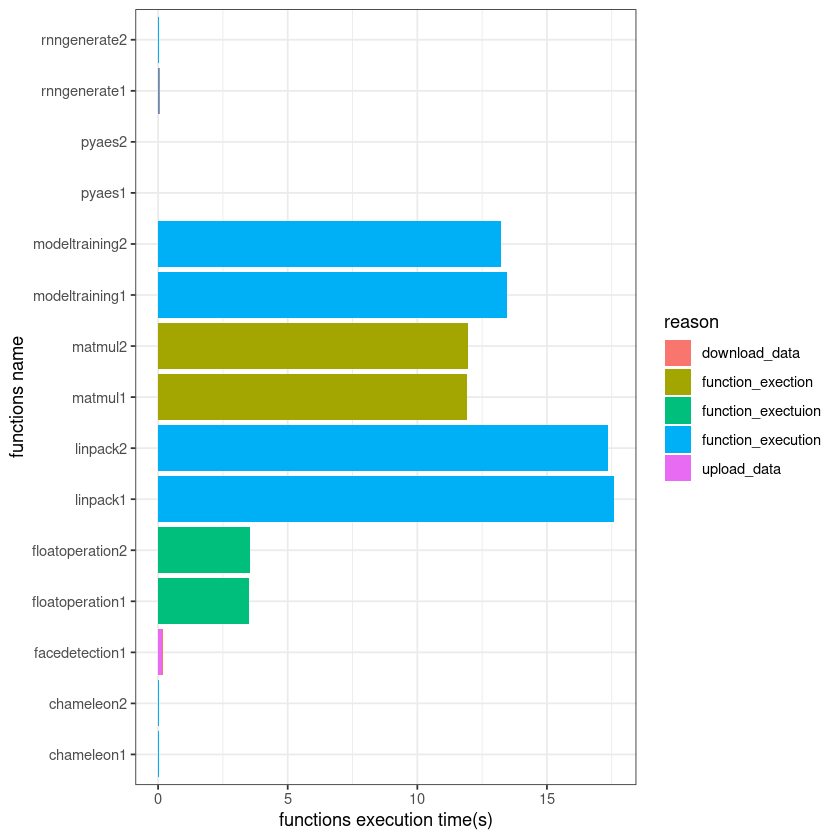

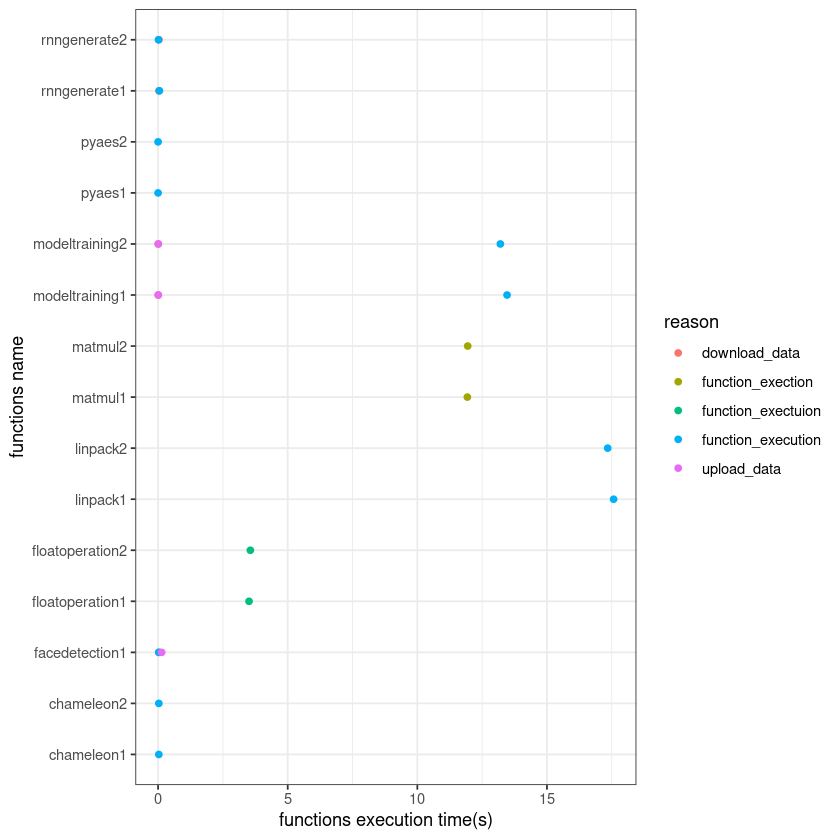

In [5]:
df_activations_selected <- df_activations %>%
    select(
        function_name,
        duration,
        reason,
        node,
        object_uid) #%>%
        #mutate(duration = (duration / 1000) %% 60)

str(df_activations_selected)
df_plot <- df_activations_selected

ggplot(data = df_plot) +
   geom_bar(aes(x = duration, y = function_name, fill = reason),stat='identity')  +
   labs(x = "functions execution time(s)", y = "functions name") +
   theme_bw() +
   ggsave('activations_bar_plot.png')

ggplot(data = df_plot) +
   geom_point(aes(x = duration, y = function_name, color = reason),stat='identity')  +
   labs(x = "functions execution time(s)", y = "functions name") +
   theme_bw() +
   ggsave('activations_point_plot.png')

In [6]:
head(df_activations)
df_activations_selected <- df_activations %>%
    select(
       #object_uid,
       function_name,
       duration,
       reason) #%>%
    #mutate(duration = (duration / 1000) %% 60)

df_spread_activations <- df_activations_selected %>%
   group_by_at(vars(-duration)) %>%
   mutate(sample_id = row_number()) %>% ungroup() %>%
   spread(reason, duration) %>%
   select(-sample_id)

summary(df_spread_activations)
head(df_spread_activations)
tail(df_spread_activations)

object_uid                       object_name    function_name  duration  
1 1105efb3c0d2457f85efb3c0d2b57f1b rnngenerate2   rnngenerate2   0.03276682
2 1105efb3c0d2457f85efb3c0d2b57f1b rnngenerate2   rnngenerate2   0.01707387
3 c978e3defaa74904b8e3defaa7590435 rnngenerate1   rnngenerate1   0.03191328
4 c978e3defaa74904b8e3defaa7590435 rnngenerate1   rnngenerate1   0.05105948
5 3667647e2d7548c9a7647e2d7538c971 facedetection1 facedetection1 0.02712560
6 3667647e2d7548c9a7647e2d7538c971 facedetection1 facedetection1 0.02712560
  reason             node message
1 download_data      NA   NA     
2 function_execution NA   NA     
3 download_data      NA   NA     
4 function_execution NA   NA     
5 download_data      NA   NA     
6 function_execution NA   NA

 function_name      download_data      function_exection function_exectuion
 Length:15          Min.   :0.004418   Min.   :11.93     Min.   :3.508     
 Class :character   1st Qu.:0.004456   1st Qu.:11.93     1st Qu.:3.521     
 Mode  :character   Median :0.027126   Median :11.94     Median :3.534     
                    Mean   :0.020136   Mean   :11.94     Mean   :3.534     
                    3rd Qu.:0.031913   3rd Qu.:11.94     3rd Qu.:3.546     
                    Max.   :0.032767   Max.   :11.94     Max.   :3.559     
                    NA's   :10         NA's   :13        NA's   :13        
 function_execution   upload_data     
 Min.   : 0.000244   Min.   :0.01161  
 1st Qu.: 0.022100   1st Qu.:0.01164  
 Median : 0.028812   Median :0.01167  
 Mean   : 5.612209   Mean   :0.05356  
 3rd Qu.:13.332632   3rd Qu.:0.07453  
 Max.   :17.572351   Max.   :0.13739  
 NA's   :4           NA's   :12       

function_name   download_data function_exection function_exectuion
1 chameleon1             NA     NA                      NA          
2 chameleon2             NA     NA                      NA          
3 facedetection1  0.0271256     NA                      NA          
4 floatoperation1        NA     NA                3.507933          
5 floatoperation2        NA     NA                3.559153          
6 linpack1               NA     NA                      NA          
  function_execution upload_data
1  0.02842498               NA  
2  0.02881241               NA  
3  0.02712560        0.1373928  
4          NA               NA  
5          NA               NA  
6 17.57235074               NA

function_name  download_data function_exection function_exectuion
1 modeltraining1 0.004456282   NA                NA                
2 modeltraining2 0.004417896   NA                NA                
3 pyaes1                  NA   NA                NA                
4 pyaes2                  NA   NA                NA                
5 rnngenerate1   0.031913280   NA                NA                
6 rnngenerate2   0.032766819   NA                NA                
  function_execution upload_data
1 1.346193e+01       0.01167250 
2 1.320333e+01       0.01160693 
3 2.441406e-04               NA 
4 4.103184e-04               NA 
5 5.105948e-02               NA 
6 1.707387e-02               NA

In [7]:
df_events_to_join <- df_processed #%>% mutate(id = row_number())
head(df_events_to_join)
df_activations_to_join <- df_spread_activations #%>% mutate(id = row_number())
head(df_activations_to_join)

#a <- merge(x = df_events_to_join, y = df_activations_to_join, by = "function_name", all = TRUE) %>% distinct()
#head(a)

df_all <- full_join(
   df_events_to_join,
   df_activations_to_join,
   by="function_name") #%>%
   #distinct()
df_all[is.na(df_all)] = 0

head(df_all)

#df_renamed <- df_all %>%
#    group_by(object_uid) %>%
#    mutate(function_name = paste(function_name, '_', substr(object_uid, 1, 4))) %>%
#    ungroup() %>%
#    select(-object_uid)
#head(df_renamed)

df_gathered <- df_all %>%
    gather(
        factor_key = 'TRUE',
        key = 'reason',
        value = 'duration',
        -function_name, -node) 
df_plot <- df_gathered

head(df_plot)
tail(df_plot)
summary(df_plot)
str(df_plot)

function_name   node         container_image_creation
1 chameleon1      kind-worker2 0                       
2 chameleon2      kind-worker2 0                       
3 facedetection1  kind-worker2 1                       
4 floatoperation1 kind-worker2 1                       
5 floatoperation2 kind-worker2 0                       
6 linpack1        kind-worker2 1                       
  container_initialization
1 0                       
2 0                       
3 0                       
4 0                       
5 0                       
6 0

function_name   download_data function_exection function_exectuion
1 chameleon1             NA     NA                      NA          
2 chameleon2             NA     NA                      NA          
3 facedetection1  0.0271256     NA                      NA          
4 floatoperation1        NA     NA                3.507933          
5 floatoperation2        NA     NA                3.559153          
6 linpack1               NA     NA                      NA          
  function_execution upload_data
1  0.02842498               NA  
2  0.02881241               NA  
3  0.02712560        0.1373928  
4          NA               NA  
5          NA               NA  
6 17.57235074               NA

function_name   node         container_image_creation
1 chameleon1      kind-worker2 0                       
2 chameleon2      kind-worker2 0                       
3 facedetection1  kind-worker2 1                       
4 floatoperation1 kind-worker2 1                       
5 floatoperation2 kind-worker2 0                       
6 linpack1        kind-worker2 1                       
  container_initialization download_data function_exection function_exectuion
1 0                        0.0000000     0                 0.000000          
2 0                        0.0000000     0                 0.000000          
3 0                        0.0271256     0                 0.000000          
4 0                        0.0000000     0                 3.507933          
5 0                        0.0000000     0                 3.559153          
6 0                        0.0000000     0                 0.000000          
  function_execution upload_data
1  0.02842498        0.0000000  
2  0.02881241        0.0000000  
3  0.02712560        0.1373928  
4  0.00000000        0.0000000  
5  0.00000000        0.0000000  
6 17.57235074        0.0000000

function_name   node         reason                   duration
1 chameleon1      kind-worker2 container_image_creation 0       
2 chameleon2      kind-worker2 container_image_creation 0       
3 facedetection1  kind-worker2 container_image_creation 1       
4 floatoperation1 kind-worker2 container_image_creation 1       
5 floatoperation2 kind-worker2 container_image_creation 0       
6 linpack1        kind-worker2 container_image_creation 1

function_name  node         reason      duration  
1 modeltraining1 kind-worker2 upload_data 0.01167250
2 modeltraining2 kind-worker2 upload_data 0.01160693
3 pyaes1         kind-worker2 upload_data 0.00000000
4 pyaes2         kind-worker2 upload_data 0.00000000
5 rnngenerate1   kind-worker2 upload_data 0.00000000
6 rnngenerate2   kind-worker2 upload_data 0.00000000

 function_name          node                                reason  
 Length:105         Length:105         container_image_creation:15  
 Class :character   Class :character   container_initialization:15  
 Mode  :character   Mode  :character   download_data           :15  
                                       function_exection       :15  
                                       function_exectuion      :15  
                                       function_execution      :15  
                                       upload_data             :15  
    duration        
 Min.   : 0.000000  
 1st Qu.: 0.000000  
 Median : 0.000000  
 Mean   : 0.951780  
 3rd Qu.: 0.004456  
 Max.   :17.572351  
                    

grouped_df [105 × 4] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ function_name: chr [1:105] "chameleon1" "chameleon2" "facedetection1" "floatoperation1" ...
 $ node         : chr [1:105] "kind-worker2" "kind-worker2" "kind-worker2" "kind-worker2" ...
 $ reason       : Factor w/ 7 levels "container_image_creation",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ duration     : num [1:105] 0 0 1 1 0 1 0 1 0 1 ...
 - attr(*, "groups")= tibble [15 × 2] (S3: tbl_df/tbl/data.frame)
  ..$ function_name: chr [1:15] "chameleon1" "chameleon2" "facedetection1" "floatoperation1" ...
  ..$ .rows        : list<int> [1:15] 
  .. ..$ : int [1:7] 1 16 31 46 61 76 91
  .. ..$ : int [1:7] 2 17 32 47 62 77 92
  .. ..$ : int [1:7] 3 18 33 48 63 78 93
  .. ..$ : int [1:7] 4 19 34 49 64 79 94
  .. ..$ : int [1:7] 5 20 35 50 65 80 95
  .. ..$ : int [1:7] 6 21 36 51 66 81 96
  .. ..$ : int [1:7] 7 22 37 52 67 82 97
  .. ..$ : int [1:7] 8 23 38 53 68 83 98
  .. ..$ : int [1:7] 9 24 39 54 69 84 99
  .. ..$ : int [1:7] 10 25 40 55 7

Saving 6.67 x 6.67 in image



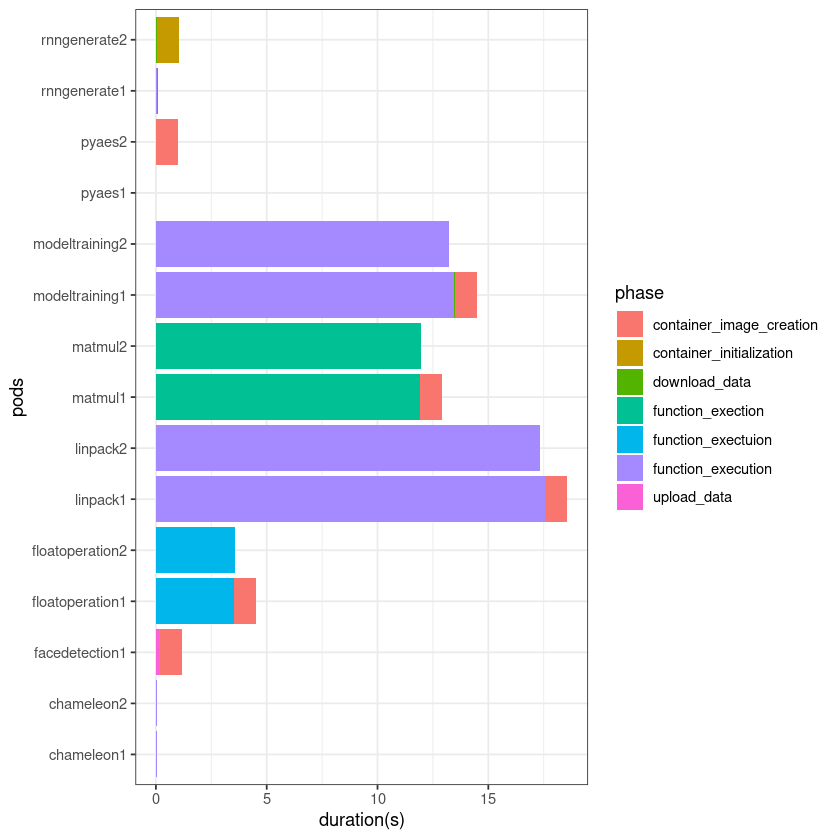

In [8]:
ggplot(data = df_plot, aes(x = duration, y = function_name, fill = reason))+#, color = node)) +
   geom_bar(stat='identity')  +
   labs(x = "duration(s)", y = "pods", fill = "phase") +
   theme_bw() +
   ggsave('full_bar_plot.png')

Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 86 rows containing missing values (geom_bar).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 86 rows containing missing values (geom_bar).”


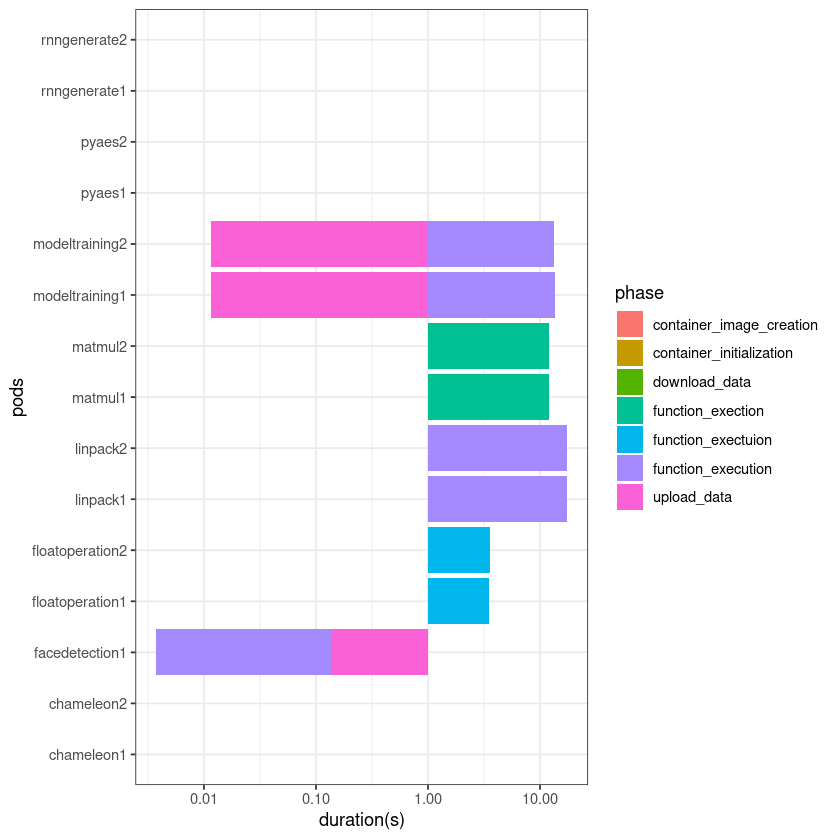

In [9]:
ggplot(data = df_plot, aes(x = duration, y = function_name, fill = reason))+#, color = node)) +
   geom_bar(stat='identity')  +
    scale_x_log10() +
   labs(x = "duration(s)", y = "pods", fill = "phase") +
   theme_bw() +
   ggsave('full_bar_plot_log10.png')

Saving 6.67 x 6.67 in image



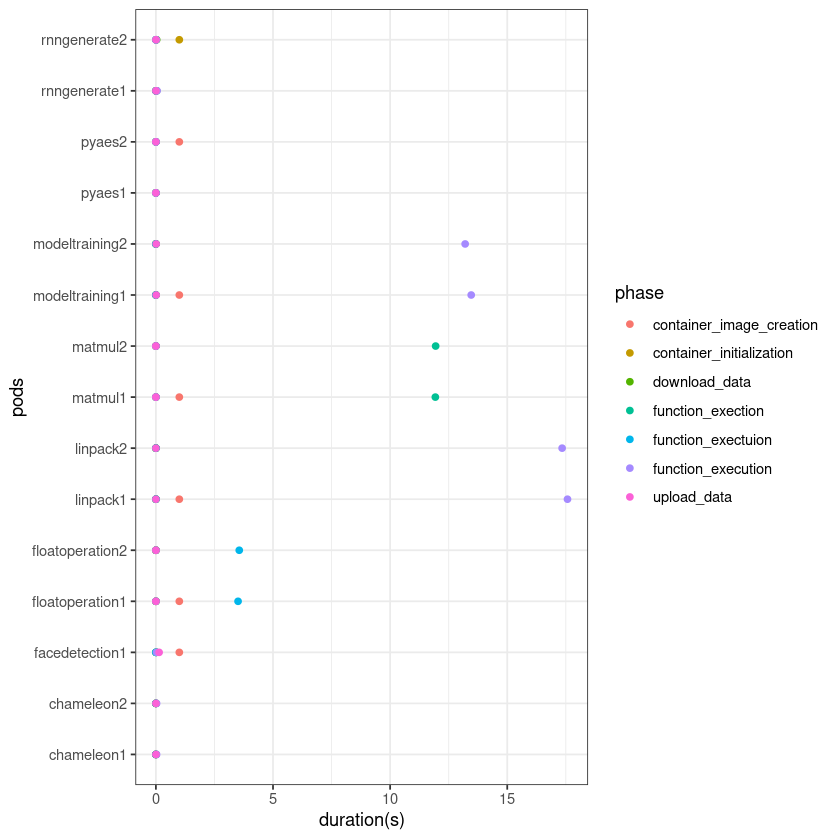

In [10]:
ggplot() +
    geom_point(data = df_plot, aes(x = duration, y = function_name, color = reason))+#, color = reason)) +
    labs(x = "duration(s)", y = "pods", color = "phase") +
    theme_bw() +
    ggsave('full_geom_point.png')

Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


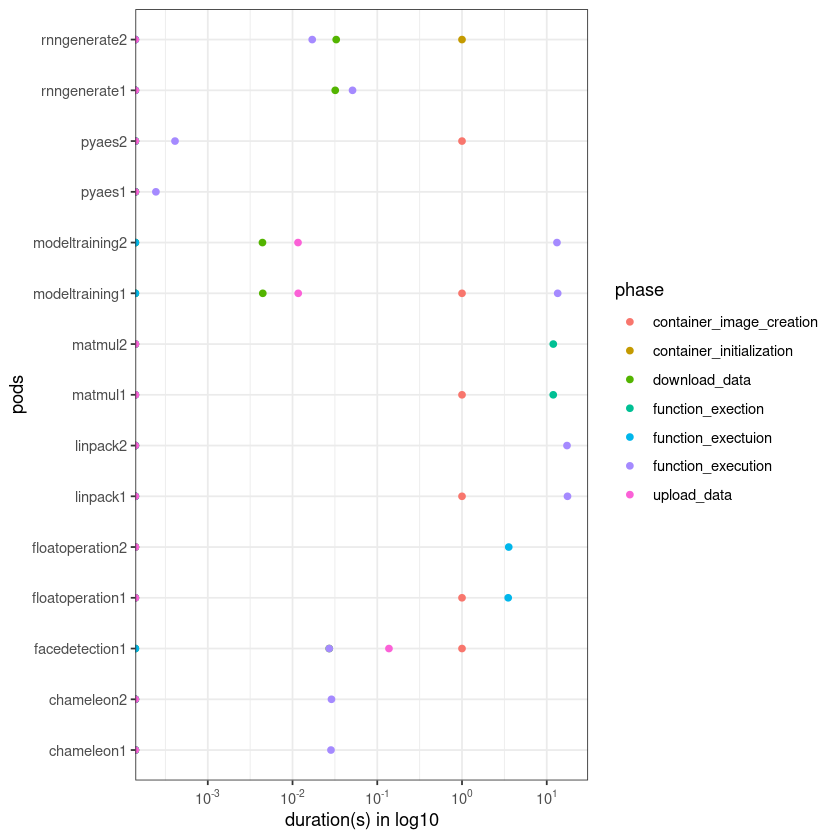

In [11]:
ggplot() +
    geom_point(data = df_plot, aes(x = duration, y = function_name, color = reason))+#, color = reason)) +
    labs(x = "duration(s) in log10", y = "pods", color = "phase") +
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
    theme_bw() +
    ggsave('full_geom_point_log10.png')